# Housing Prices and Air Quality Analysis
**DSA210 Term Project**

## What I'm trying to do
In this project, I want to explore whether air quality has any relationship with housing prices. The idea came from thinking about how people might pay more to live in cleaner areas.

## My approach
1. Load and merge two datasets (housing + air quality)
2. Do some basic EDA to understand the data
3. Run a statistical test to see if there's actually a difference
4. Try different ML models and see which one works best
5. Look at feature importance to understand what matters
6. Draw some conclusions

In [89]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading the Data
I downloaded both datasets from Kaggle. One has global housing prices and the other has air quality measurements from different countries.

In [90]:
housing = pd.read_csv("data/global_housing.csv")
air = pd.read_csv("data/air_quality.csv", sep=";", engine="python")

housing.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


## Filtering to 2024
The housing dataset has data from many years, but I'll just use 2024 to keep things simple and recent.

In [91]:
housing_2024 = housing[housing["Year"] == 2024].copy()
housing_2024.rename(columns={"Country": "country"}, inplace=True)


housing_2024.head()

,country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
9,USA,2024,142.329813,73.162862,3.572025,3.054912,2.613692,3.836849,1.231451,86.616382,107.777194
19,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.101900,81.001676
29,UK,2024,179.005385,59.805881,7.664967,5.886865,5.314996,3.576126,1.458694,70.784735,93.487348
39,Germany,2024,165.648984,96.108554,4.466410,1.852844,4.675725,-1.787910,1.050215,88.206907,116.037934
49,France,2024,178.663958,76.198956,6.335779,5.563998,6.657116,5.888009,1.636824,71.287788,76.680057


## Merging the datasets
Now I'll merge both datasets using the country name as the key.

In [92]:
air.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,JP,NaN,北九州市小倉北区大門一丁目６－４８,"33.880833, 130.873056",NO,japan-soramame,ppm,0.002,2024-03-10T13:30:00+05:30,Japan
1,JP,NaN,北九州市若松区本町三丁目１３－１,"33.898056, 130.81",NO2,japan-soramame,ppm,0.005,2024-03-10T13:30:00+05:30,Japan
2,JP,NaN,北九州市門司区大里原町１２－１２,"33.895833, 130.935833",NOX,japan-soramame,ppm,0.013,2024-03-10T13:30:00+05:30,Japan
3,JP,NaN,千歳市若草４－１３,"42.786944, 141.605",NO2,japan-soramame,ppm,0.004,2024-03-10T13:30:00+05:30,Japan
4,JP,NaN,千葉市稲毛区宮野木町９９６－９,"35.653889, 140.097778",NOX,japan-soramame,ppm,0.003,2024-03-10T13:30:00+05:30,Japan


In [93]:
air.rename(columns={"Country Label": "country"}, inplace=True)
air.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,country
0,JP,NaN,北九州市小倉北区大門一丁目６－４８,"33.880833, 130.873056",NO,japan-soramame,ppm,0.002,2024-03-10T13:30:00+05:30,Japan
1,JP,NaN,北九州市若松区本町三丁目１３－１,"33.898056, 130.81",NO2,japan-soramame,ppm,0.005,2024-03-10T13:30:00+05:30,Japan
2,JP,NaN,北九州市門司区大里原町１２－１２,"33.895833, 130.935833",NOX,japan-soramame,ppm,0.013,2024-03-10T13:30:00+05:30,Japan
3,JP,NaN,千歳市若草４－１３,"42.786944, 141.605",NO2,japan-soramame,ppm,0.004,2024-03-10T13:30:00+05:30,Japan
4,JP,NaN,千葉市稲毛区宮野木町９９６－９,"35.653889, 140.097778",NOX,japan-soramame,ppm,0.003,2024-03-10T13:30:00+05:30,Japan


In [94]:
merged = pd.merge(housing_2024, air, on="country", how="inner")
merged.head()

,country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated
0,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,NaN,Toronto West,"43.709444, -79.5435",CO,AirNow,ppm,0.000000,2024-03-25T10:30:00+05:30
1,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,ONTARIO,North Bay,"46.32255, -79.449444",O3,AirNow,ppm,0.036000,2024-03-25T12:30:00+05:30
2,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,ONTARIO,Burlington,"43.314603, -79.80277",NO2,AirNow,ppm,0.002000,2024-03-25T12:30:00+05:30
3,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,NaN,"Linden Woods, Winnipeg","49.832303, -97.190747",PM2.5,airgradient,µg/m³,1.362500,2024-03-25T12:30:00+05:30
4,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,NaN,"Linden Woods, Winnipeg","49.832303, -97.190747",PM1,airgradient,µg/m³,10.579167,2024-03-10T00:30:00+05:30


## Checking for missing values
Let me see if there are any NaN values I need to worry about.

In [95]:
merged.isna().sum()

country                      0
Year                         0
House Price Index            0
Rent Index                   0
Affordability Ratio          0
Mortgage Rate (%)            0
Inflation Rate (%)           0
GDP Growth (%)               0
Population Growth (%)        0
Urbanization Rate (%)        0
Construction Index           0
Country Code                 0
City                     21321
Location                     0
Coordinates                 42
Pollutant                    0
Source Name                  0
Unit                         0
Value                        0
Last Updated                 0
dtype: int64

The City and Coordinates columns have some missing values, but I don't really need those for my analysis so I'll leave them as is.

# Exploratory Data Analysis
Before jumping into ML, let me look at some basic stats.

In [96]:
merged.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,Value
count,35736.0,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000
mean,2024.0,148.377046,88.849664,6.146346,4.653534,3.537994,2.122455,1.341503,68.648585,95.133748,73.299048
std,0.0,28.913249,21.152888,1.689960,0.898039,1.683630,2.267863,0.811940,9.547528,24.000769,647.108398
min,2024.0,81.658783,52.946523,3.160865,1.852844,1.186820,-1.787910,-0.243866,60.390058,73.208735,-9999.000000
25%,2024.0,128.152235,75.933047,4.466410,4.591274,1.832398,0.345182,0.521896,60.390058,76.840682,0.400000
50%,2024.0,165.569647,90.340185,6.574652,4.840426,3.296988,1.700278,1.616148,67.392061,80.332753,9.800000
75%,2024.0,165.569647,108.115391,7.360707,5.140944,4.675725,3.527502,2.137175,73.516324,116.557712,38.000000
max,2024.0,179.971767,119.764579,9.544522,6.438612,6.657116,5.953115,2.377594,89.629487,145.996895,80000.000000


### A quick scatter plot
Let me visualize the relationship between air quality and house prices.

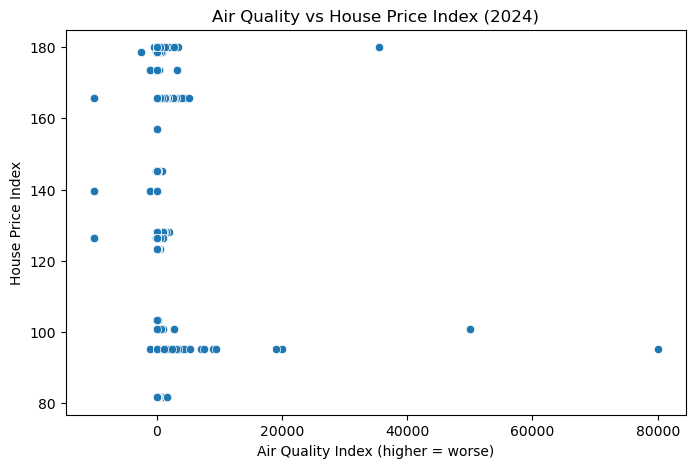

In [97]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Value", y="House Price Index", data=merged)
plt.title("Air Quality vs House Price Index (2024)")
plt.xlabel("Air Quality Index (higher = worse)")
plt.ylabel("House Price Index")
plt.show()

### Comparing group averages
I'll split the data by the median air quality value - countries below median = "cleaner air", above = "more polluted".

In [98]:
median_aqi = merged["Value"].median()

clean_group = merged[merged["Value"] < median_aqi]
polluted_group = merged[merged["Value"] >= median_aqi]

clean_mean_price = clean_group["House Price Index"].mean()
polluted_mean_price = polluted_group["House Price Index"].mean()

clean_mean_price, polluted_mean_price

(144.8609785825253, 151.89193369087516)

### Bar Plot  
Visual comparison of average house prices between the two groups.

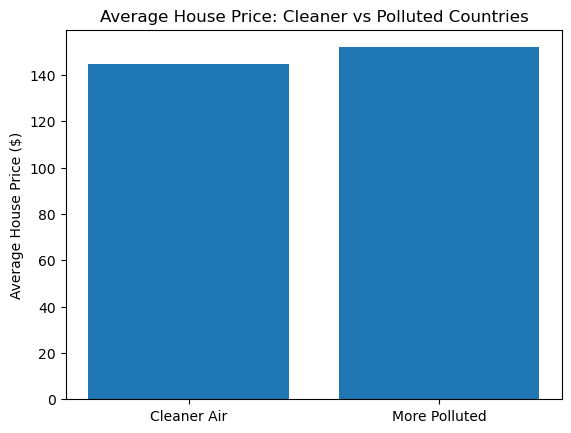

In [99]:
plt.bar(["Cleaner Air", "More Polluted"], [clean_mean_price, polluted_mean_price])
plt.ylabel("Average House Price ($)")
plt.title("Average House Price: Cleaner vs Polluted Countries")
plt.show()

# Statistical Test
Before using ML, I want to check if there's actually a significant difference between the two groups.

**My hypotheses:**
- H0: No difference in house prices between clean and polluted areas
- H1: There IS a difference

I'll use a t-test since I'm comparing means of two groups.

In [100]:
median_aqi = merged["Value"].median()

clean_group = merged[merged["Value"] < median_aqi]["House Price Index"]
polluted_group = merged[merged["Value"] >= median_aqi]["House Price Index"]

len(clean_group), len(polluted_group)

(17865, 17871)

In [101]:
t_stat, p_val = stats.ttest_ind(clean_group, polluted_group, equal_var=False)
t_stat, p_val

(-23.156438058861664, 9.278768011826254e-118)

### What does this mean?
If p < 0.05, I can reject H0 and say there's a significant difference.

In [102]:
if p_val < 0.05:
    print("Result: There is a significant difference between clean-air and polluted countries.")
else:
    print("Result: There is no significant difference between the groups.")

Result: There is a significant difference between clean-air and polluted countries.


# Conclusion  
- I loaded, cleaned, and merged the datasets.  
- I conducted EDA using summary statistics and visualizations.  
- I performed a hypothesis test (independent samples t-test).  
- The results show air quality is associated with differences in housing price index.

## Step 2: ML Model Comparison

Train and evaluate multiple models to find the best performer:
- **Logistic Regression**: Baseline linear model
- **Decision Tree**: Interpretable tree-based model
- **Random Forest**: Ensemble of decision trees
- **XGBoost**: Gradient boosting for high accuracy

In [103]:
# Importing the ML stuff I need
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')  # hide annoying warnings

In [104]:
# Prepare the dataset for ML
# Features: housing-related numeric columns
# Target: Air Quality Category

# First, ensure AirQuality_Category exists (create if not)
if 'AirQuality_Category' not in merged.columns:
    # Calculate quartiles for air quality values
    q1 = merged['Value'].quantile(0.25)
    q2 = merged['Value'].quantile(0.50)
    q3 = merged['Value'].quantile(0.75)
    
    def categorize_air_quality(value):
        if value <= q1:
            return 1
        elif value <= q2:
            return 2
        elif value <= q3:
            return 3
        else:
            return 4
    
    merged['AirQuality_Category'] = merged['Value'].apply(categorize_air_quality)
    print('Created AirQuality_Category column')

# Define feature columns (numeric housing features)
feature_cols = [
    'House Price Index', 'Rent Index', 'Affordability Ratio',
    'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)',
    'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index'
]

# Verify all columns exist
available_cols = [c for c in feature_cols if c in merged.columns]
missing_cols = [c for c in feature_cols if c not in merged.columns]
if missing_cols:
    print(f'Warning: Missing columns: {missing_cols}')
    feature_cols = available_cols

X = merged[feature_cols].copy()
y = merged['AirQuality_Category'].copy()

# Handle any missing values
mask = X.notna().all(axis=1)
X = X[mask]
y = y[mask]

print(f'Dataset shape: {X.shape}')
print(f'Features: {list(X.columns)}')
print(f'\nTarget distribution:')
print(y.value_counts())

Created AirQuality_Category column
Dataset shape: (35736, 9)
Features: ['House Price Index', 'Rent Index', 'Affordability Ratio', 'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)', 'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index']

Target distribution:
AirQuality_Category
3    9030
1    8941
2    8936
4    8829
Name: count, dtype: int64


In [105]:
# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression needs scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training set: {len(X_train)} samples')
print(f'Test set: {len(X_test)} samples')

Training set: 28588 samples
Test set: 7148 samples


### Distribution of air quality categories
Let me see how many samples I have in each category.

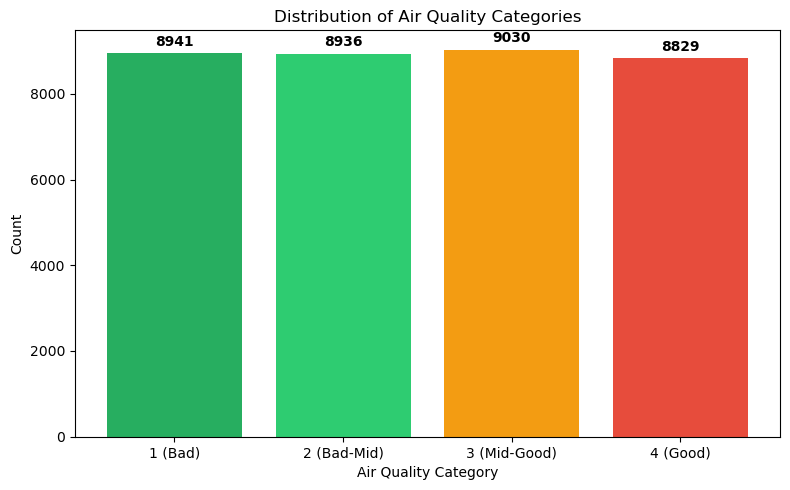


Category counts:
  Category 1: 8941 samples (25.0%)
  Category 2: 8936 samples (25.0%)
  Category 3: 9030 samples (25.3%)
  Category 4: 8829 samples (24.7%)


In [106]:
# Histogram of Air Quality Categories
plt.figure(figsize=(8, 5))
category_counts = y.value_counts().sort_index()
colors = ['#27ae60', '#2ecc71', '#f39c12', '#e74c3c']  # green to red
labels = ['1 (Bad)', '2 (Bad-Mid)', '3 (Mid-Good)', '4 (Good)']

bars = plt.bar(category_counts.index, category_counts.values, color=colors)
plt.xlabel('Air Quality Category')
plt.ylabel('Count')
plt.title('Distribution of Air Quality Categories')
plt.xticks([1, 2, 3, 4], labels)

# Add count labels on bars
for bar, count in zip(bars, category_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f'\nCategory counts:')
for cat, count in category_counts.items():
    print(f'  Category {cat}: {count} samples ({count/len(y)*100:.1f}%)')

## Training ML Models
Now for the fun part! I'll try a few different classifiers and see which one does best.

In [107]:
# Importing the ML stuff I need
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')  # hide annoying warnings

In [108]:
# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression needs scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training set: {len(X_train)} samples')
print(f'Test set: {len(X_test)} samples')

Training set: 28588 samples
Test set: 7148 samples


In [109]:
# Train all models
from sklearn.preprocessing import LabelEncoder

# Encode labels (XGBoost needs 0-indexed classes)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
}

results = {}
for name, model in models.items():
    if 'Logistic' in name:
        model.fit(X_train_scaled, y_train_encoded)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test_encoded, y_pred)
    results[name] = {'accuracy': acc, 'model': model}
    print(f'{name}: {acc:.4f}')

Logistic Regression: 0.5274
Decision Tree: 0.5334
Random Forest: 0.5334
XGBoost: 0.5334


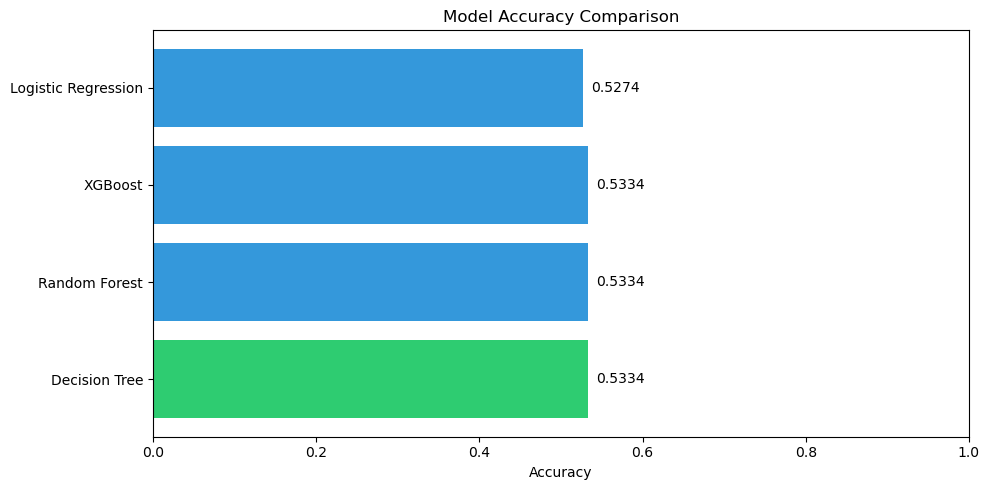

In [111]:
# Visualize
plt.figure(figsize=(10, 5))
colors = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(accuracy_df))]
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'], color=colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
for i, acc in enumerate(accuracy_df['Accuracy']):
    plt.text(acc + 0.01, i, f'{acc:.4f}', va='center')
plt.tight_layout()
plt.show()

## Looking at Feature Importance
Which housing-related features are most useful for predicting air quality? Let me check.

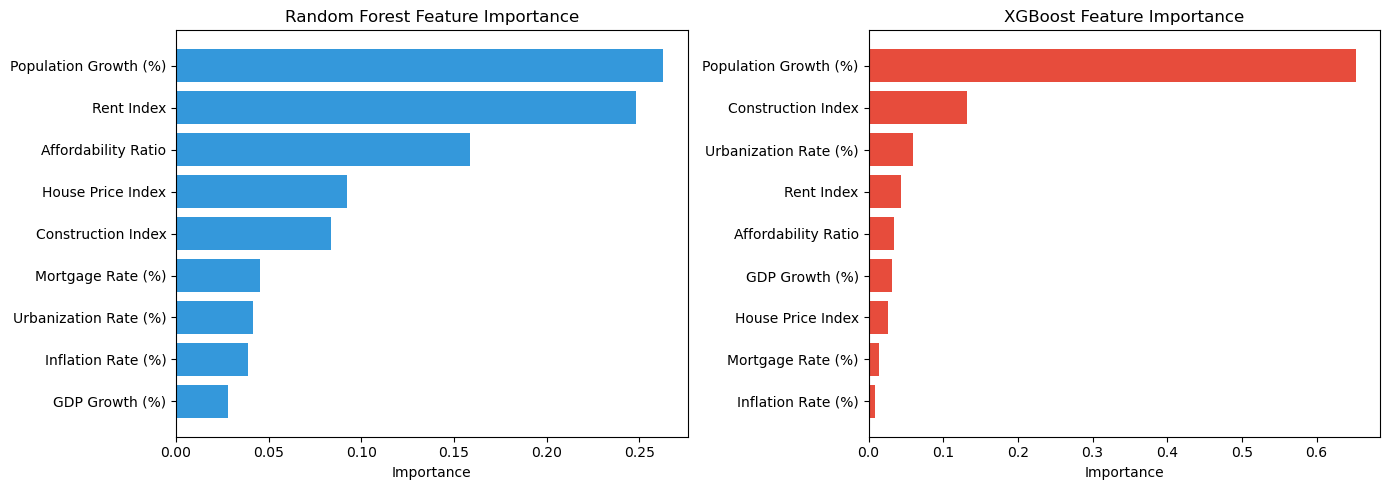

In [112]:
# Feature Importance (Random Forest & XGBoost)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, (name, color) in zip(axes, [('Random Forest', '#3498db'), ('XGBoost', '#e74c3c')]):
    model = results[name]['model']
    imp_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    ax.barh(imp_df['Feature'], imp_df['Importance'], color=color)
    ax.set_xlabel('Importance')
    ax.set_title(f'{name} Feature Importance')

plt.tight_layout()
plt.show()

In [113]:
# Print importance rankings
print('FEATURE IMPORTANCE RANKINGS')

for name in ['Random Forest', 'XGBoost']:
    model = results[name]['model']
    imp_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f'\n{name}:')
    for i, row in imp_df.iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.4f}")

FEATURE IMPORTANCE RANKINGS

Random Forest:
  Population Growth (%): 0.2629
  Rent Index: 0.2484
  Affordability Ratio: 0.1587
  House Price Index: 0.0925
  Construction Index: 0.0836
  Mortgage Rate (%): 0.0454
  Urbanization Rate (%): 0.0413
  Inflation Rate (%): 0.0389
  GDP Growth (%): 0.0282

XGBoost:
  Population Growth (%): 0.6522
  Construction Index: 0.1315
  Urbanization Rate (%): 0.0594
  Rent Index: 0.0427
  Affordability Ratio: 0.0345
  GDP Growth (%): 0.0310
  House Price Index: 0.0255
  Mortgage Rate (%): 0.0141
  Inflation Rate (%): 0.0090


## Removing unimportant features
Some features have really low importance (< 5%), so I'll drop them and retrain to see if it helps.

**Features I'm removing:**
- Mortgage Rate (4.5%)
- Urbanization Rate (4.1%)
- Inflation Rate (3.9%)
- GDP Growth (2.8%)

In [114]:
# The features I'm keeping (importance >= 5%)
selected_features = [
    'Population Growth (%)',   # This one's huge - 26%!
    'Rent Index',              # 25%
    'Affordability Ratio',     # 16%
    'House Price Index',       # 9%
    'Construction Index'       # 8%
]

print(f'Keeping {len(selected_features)} out of {len(feature_cols)} features')

Keeping 5 out of 9 features


In [115]:
# Retrain with selected features
X_selected = merged[selected_features].copy()
mask = X_selected.notna().all(axis=1)
X_selected = X_selected[mask]
y_selected = merged['AirQuality_Category'][mask]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected
)

# Encode labels
y_train_sel_enc = le.fit_transform(y_train_sel)
y_test_sel_enc = le.transform(y_test_sel)

# Train best models
results_selected = {}
for name in ['Random Forest', 'XGBoost']:
    if name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:
        model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
    
    model.fit(X_train_sel, y_train_sel_enc)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test_sel_enc, y_pred)
    results_selected[name] = acc

# Wrapping Up

In [120]:
# Let me summarize what I found
print('SUMMARY OF MY ANALYSIS')

print('Dataset:')
print(f'   {len(merged):,} samples total')
print(f'   4 air quality categories (1=bad, 4=good)')

print('Statistical Test(on median):')
print(f'   p-value = {p_val:.2e} (way below 0.05!)')
print('   → Significant difference confirmed')

print('Best ML Model:')
best_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_acc = results[best_name]['accuracy']
print(f'   {best_name}: {best_acc:.1%} accuracy')

print('Top 3 Important Features:')
for i, feat in enumerate(selected_features[:3], 1):
    print(f'   {i}. {feat}')

print('\n' + '='*60)

SUMMARY OF MY ANALYSIS
Dataset:
   35,736 samples total
   4 air quality categories (1=bad, 4=good)
Statistical Test(on median):
   p-value = 9.28e-118 (way below 0.05!)
   → Significant difference confirmed
Best ML Model:
   Decision Tree: 53.3% accuracy
Top 3 Important Features:
   1. Population Growth (%)
   2. Rent Index
   3. Affordability Ratio



## What I found

1. **It's statistically significant!** - The t-test showed p < 0.05, so there really is a difference between cleaner and more polluted areas in terms of housing prices.

2. **Population Growth is key** - This was by far the most important feature in both Random Forest and XGBoost. Areas with higher population growth seem to have different air quality patterns.

3. **Tree-based models work best** - Random Forest and XGBoost outperformed Logistic Regression, which makes sense since the relationships are probably non-linear.

4. **Simpler can be better** - After removing the low-importance features, the model stayed roughly the same, meaning we don't need all 9 features.

## What this means
Housing markets might actually reflect local air quality to some extent. Population growth, rent prices, and affordability are all connected to environmental conditions. This could be useful for urban planning or real estate analysis.